# National Assembly of Pakistan Data Analysis

The dataset contains data of all the members of National Assembly of Pakistan. It contains around 340 rows which have columns like NASeat, PersonName, Party, Profession, Contact details.

We will try to answer the following questions based on the data

1) Which party contains how many members in the assembly. Furthermore,

2) Which party contains the most educated members.

We will initiate our analysis from importing libraries, loading data, doing exploratory data analysis and then data visualization based on the given data

## Step1: Import Useful Libraries

In [1]:
# For data analysis, we import pandas library
import pandas as pd

# For numerical computation, we will use numpy library
import numpy as np

# For data visualization, we will use matplotlib and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

## Step2: Load and explore data

**If openpyxl error occurs, then install it using the following syntax**

> pip install openpyxl

In [2]:
#load data from excel file
df = pd.read_excel('NA_list.xlsx')

#Display first five rows of data
df.head()

,NA Seat,Name,Party,Profession/Education,Address,Contact
0,NA-1Chitral,Moulana Abdul Akbar Chitrali,MMAP,B.ED,"Village Broze Goldeh, Tehsil & District Chitra...","0345-9411119, 0333-9100811"
1,NA-2Swat-I,Dr. Haider Ali Khan,PTI,MBBS,"Khawza Khela, Swat. C-302, Parliament Lodges,...","0946-745333, 0300-5749444"
2,NA-3Swat-II,Mr. Saleem Rehman,PTI,FA,"Shandara Mingora, Tehsil Babuzai, District Swa...","0946-722335, 0333-9279679"
3,NA-4Swat-III,Mr. Murad Saeed,PTI,Bachelor in Environmental Sciences,Mohalla Sher Mohd Sher Village and P.O. Kabal...,0300-0848410
4,NA-5Upper Dir,Sahibzada Sibghatullah,PTI,M.A in Political Science,"Village Kotkey Sahib Abad Wari. H-412, Parlia...","0944-884005, 0313-8802230, 0343-8802230"


In [3]:
# Check shape of data
rows, columns = df.shape

print(f'In national assembly of pakistan dataset there are {rows} rows and {columns} columns')

In national assembly of pakistan dataset there are 340 rows and 6 columns


In [4]:
# Check Structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NA Seat               340 non-null    object
 1   Name                  340 non-null    object
 2   Party                 340 non-null    object
 3   Profession/Education  340 non-null    object
 4   Address               340 non-null    object
 5   Contact               251 non-null    object
dtypes: object(6)
memory usage: 16.1+ KB


In [5]:
# Check missing values in dataset
df.isnull().sum()

NA Seat                  0
Name                     0
Party                    0
Profession/Education     0
Address                  0
Contact                 89
dtype: int64

**As we saw there are 89 missing values in contact columns, and in our dataset the presence of contact column making no sense, there we will remove this column**

In [6]:
#Remove contact column
df.drop('Contact', axis = 1, inplace = True)

In [7]:
# check 10 random sample values from our data
df.sample(10)

,NA Seat,Name,Party,Profession/Education,Address
170,NA-172 Bahawalpur-III,Chaudhary Tariq Bashir Cheema,PML,BA,H.No.35-A Mohallah Sattelite Town Bahawalpur. ...
225,NA-227Hyderabad-III,Mr. Salahuddin,MQMP,Master in Arts,"H.No.D/68-1025, Bhai Khan Chari, Hyderabad. E..."
310,RESERVED SEATS FOR WOMEN,Ms. Farukh Khan,PML,Graduation,"H.No. 21, St. No. 30, F-8/1, Islamabad."
38,NA-40Bajaur Agency-I Tribal Area-I,Mr. Gul Dad Khan,PTI,Masters,Zeni Khel Mor Darra Tehsil Barang Bajaur. Lod...
289,RESERVED SEATS FOR WOMEN,Dr. Samina Matloob,PML-N,MBBS,"Chak No. 100/M, Tehsil and District Lodhran H..."
264,NA-267 Mastung-cum-Kalat-cum-Shaheed-Sikandarabad,Syed Mehmood Shah,MMAP,BA,"Muhallah Muslim Muhallah Kalat. J-512, Parlia..."
155,NA-157Multan-IV,Makhdoom Zain Hussain Qureshi,PTI,Bachelor in Arts,Bab-Al-Quresh Daulat Gate Circular Road House ...
145,NA-147Sahiwal-I,Syed Imran Ahmad Shah,PML-N,LLB,Sadaat Manzi! Nai Abadi Sahiwal. Suite No. 21...
131,NA-133Lahore-XI,Ms. Shaista Pervaiz Malik,PML-N,Masters,"House No.142-E/1, Mohallah Gulberg-III, Lahore"
221,NA-223Matiari,Makhdoom Jameel Uz Zaman,PPPP,MA,Makhdoom House Hala New District Matiari. C-2...


## Step3: Data Analysis and Data Visualization

### 1- Which party contains how many members in the assembly ?

In [8]:
# Check unique values in party column
list(df['Party'].unique())

['MMAP',
 'PTI',
 'PML-N',
 'ANP',
 'PPPP',
 'Ind',
 'AMLP',
 'PML',
 'GDA',
 'MQMP',
 'BAP',
 'JWP',
 'BNP']

In [9]:
#groupby the members using the party column
party_na = df.groupby('Party')['NA Seat'].count().sort_values(ascending = False)

#Convert the groupby output to dataframe
party_df = pd.DataFrame({'Party' : party_na.index, 'Members' : party_na.values})

#view dataframe
party_df


,Party,Members
0,PTI,155
1,PML-N,84
2,PPPP,56
3,MMAP,15
4,MQMP,6
5,BAP,5
6,PML,5
7,BNP,4
8,Ind,4
9,GDA,3


**We have arranged the data in a way that how many national assembly members belongs to each party. Lets plot it**

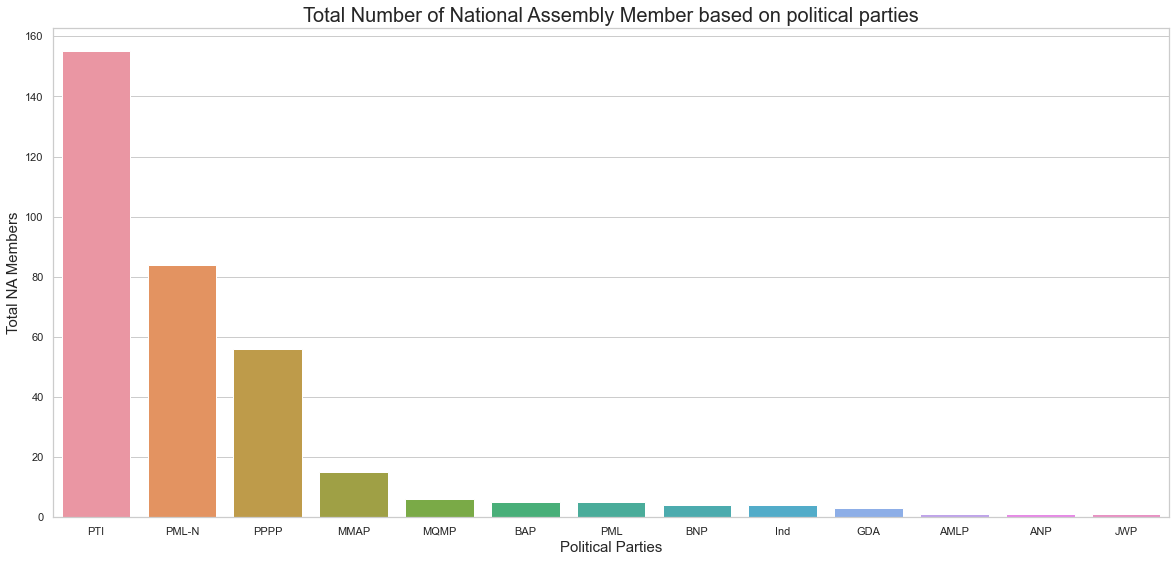

In [10]:
#set the figure size
plt.figure(figsize=(20, 9))

#set theme
sns.set_theme(style="whitegrid")

#Bar plot
sns.barplot(x = 'Party', y= 'Members', data = party_df)
plt.title('Total Number of National Assembly Member based on political parties', size = 20)
plt.xlabel('Political Parties', size = 15)
plt.ylabel('Total NA Members', size = 15)
plt.show()


**We saw that PTI has the maximum numbers of national assembly members i.e. 155, PML-N has 84 members and PPP has 56 members**

### 2- Which party contains the most educated national assembly members

To give the answers with respect to given data, we individually visualize the data of most common party members qualification and education.

#### 2.1- Qualifications of National Assembly Members of PTI

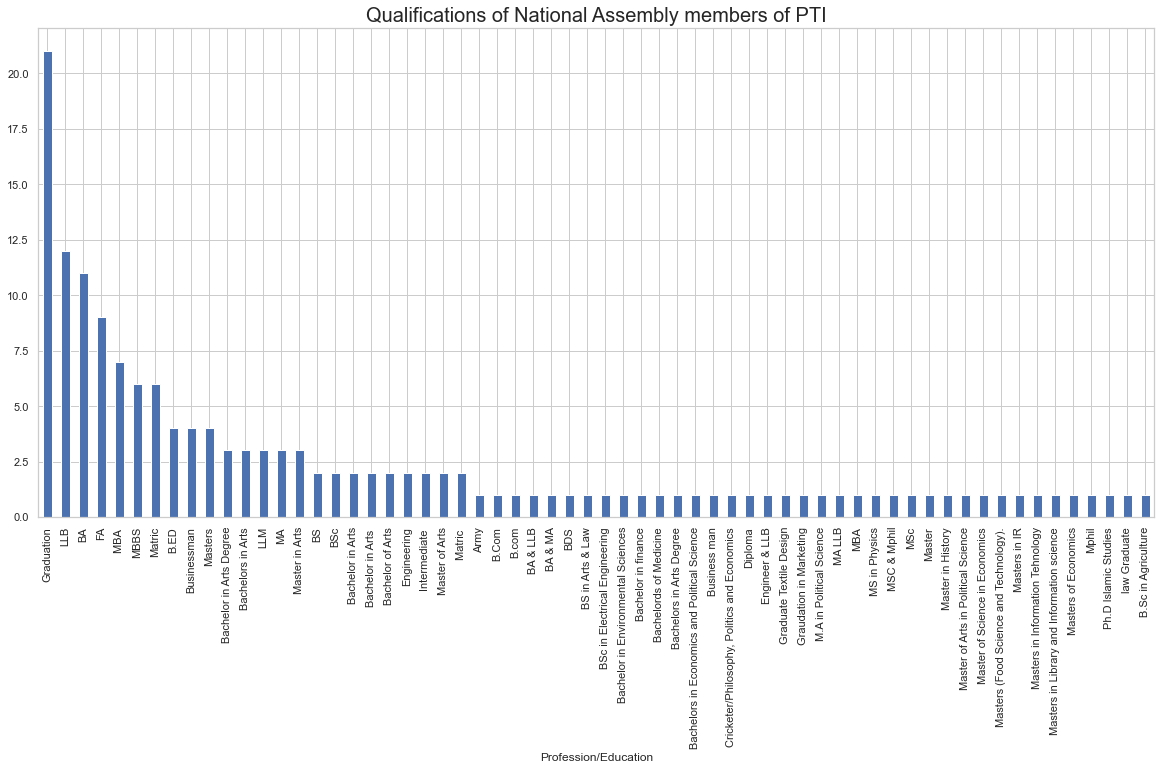

In [11]:
plt.figure(figsize=(20, 9))
df.groupby('Party')['Profession/Education'].value_counts().loc['PTI'].plot(kind = 'bar')
plt.title('Qualifications of National Assembly members of PTI', size = 20)
plt.show()

**PTI has the most educated members of national assembly of pakistan in different subjects from which majority are graduated, LLB and BA**

#### 2.2- Qualifications of National Assembly Members of PML-N

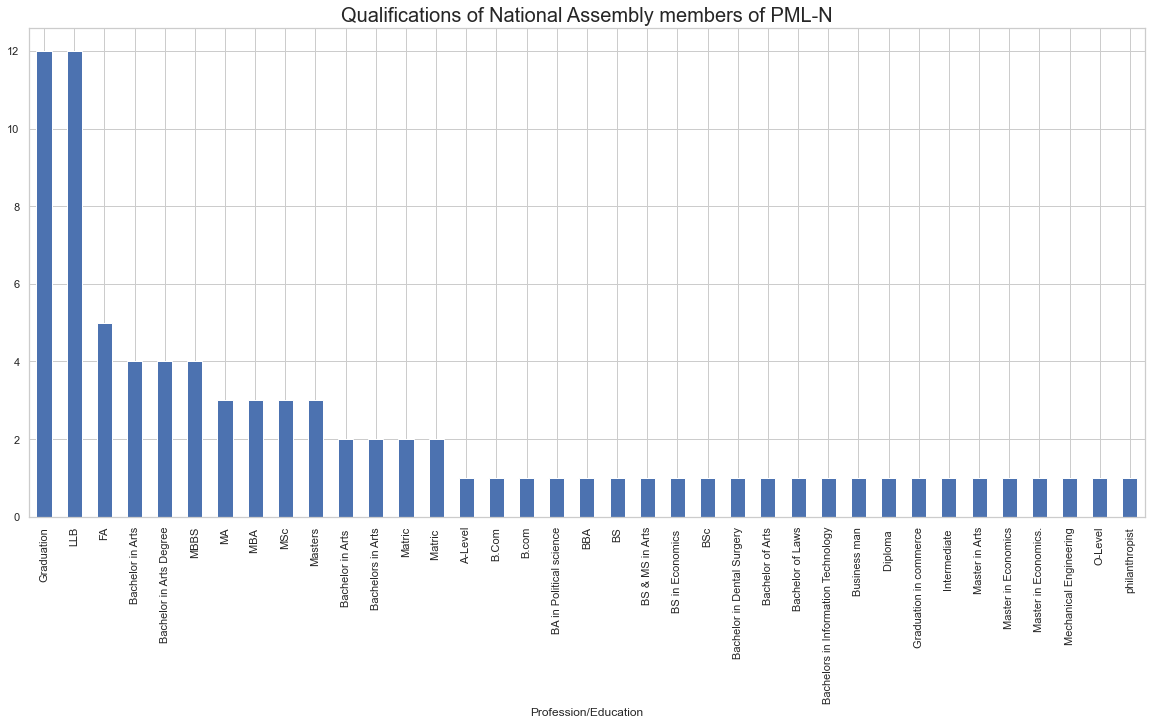

In [12]:
plt.figure(figsize=(20, 9))
df.groupby('Party')['Profession/Education'].value_counts().loc['PML-N'].plot(kind = 'bar')
plt.title('Qualifications of National Assembly members of PML-N', size = 20)
plt.show()

**After PTI, the PML-N National Assembly members qualification are less as compared to PTI, but they majority did graduation and LLB**

#### 2.3- Qualifications of National Assembly Members of PPPP

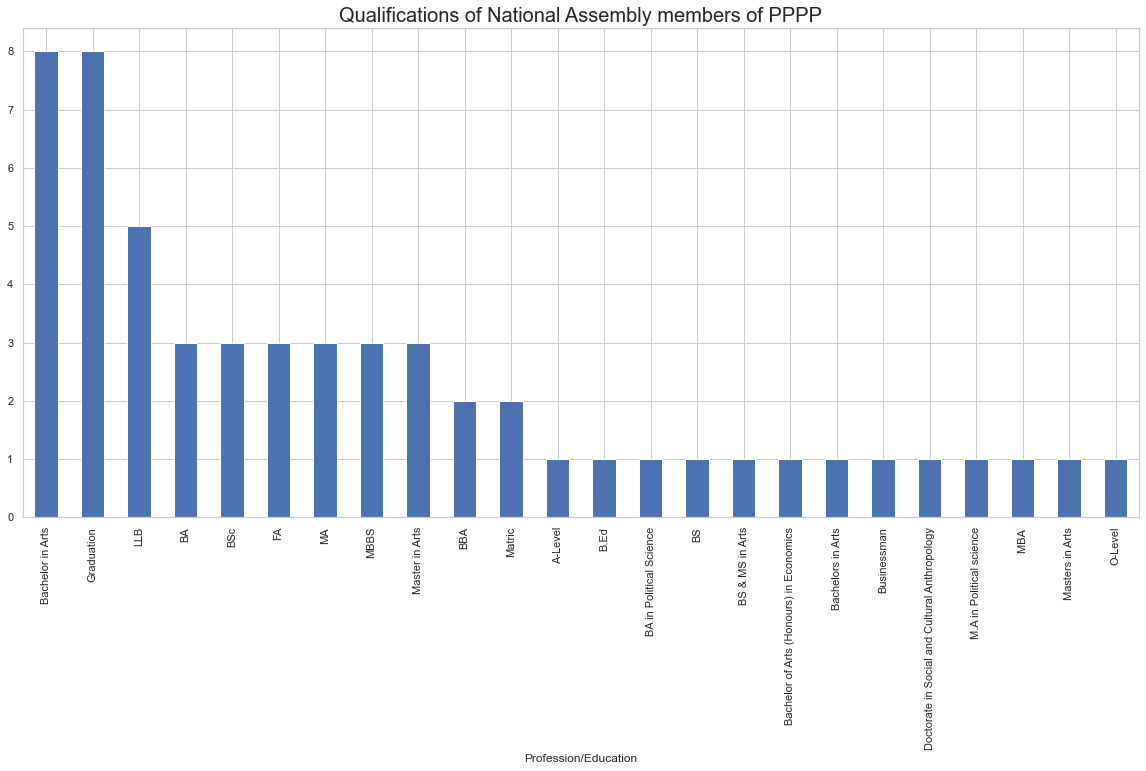

In [13]:
plt.figure(figsize=(20, 9))
df.groupby('Party')['Profession/Education'].value_counts().loc['PPPP'].plot(kind = 'bar')
plt.title('Qualifications of National Assembly members of PPPP', size = 20)
plt.show()

**PPP contains less number of national assembly members with regards to qualification as compared to PML-N. They usually did bachelors in arts and graduation**

#### 2.4- Qualifications of National Assembly Members of MNAP

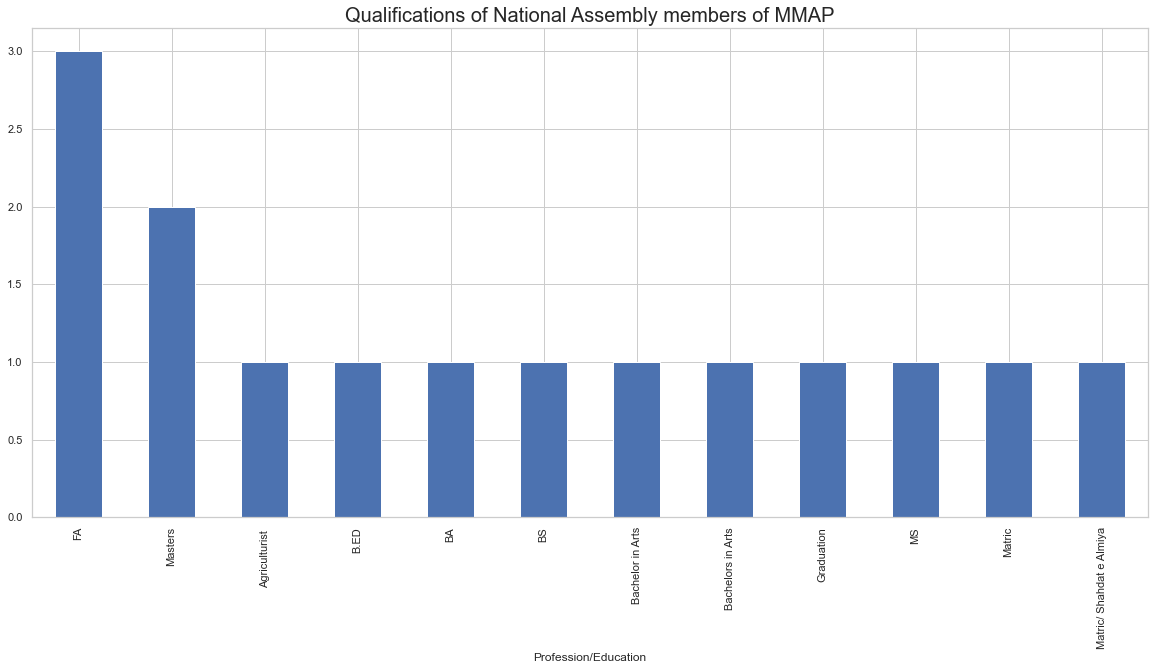

In [14]:
plt.figure(figsize=(20, 9))
df.groupby('Party')['Profession/Education'].value_counts().loc['MMAP'].plot(kind = 'bar')
plt.title('Qualifications of National Assembly members of MMAP', size = 20)
plt.show()

#### 2.5- Qualifications of National Assembly Members of MQMP

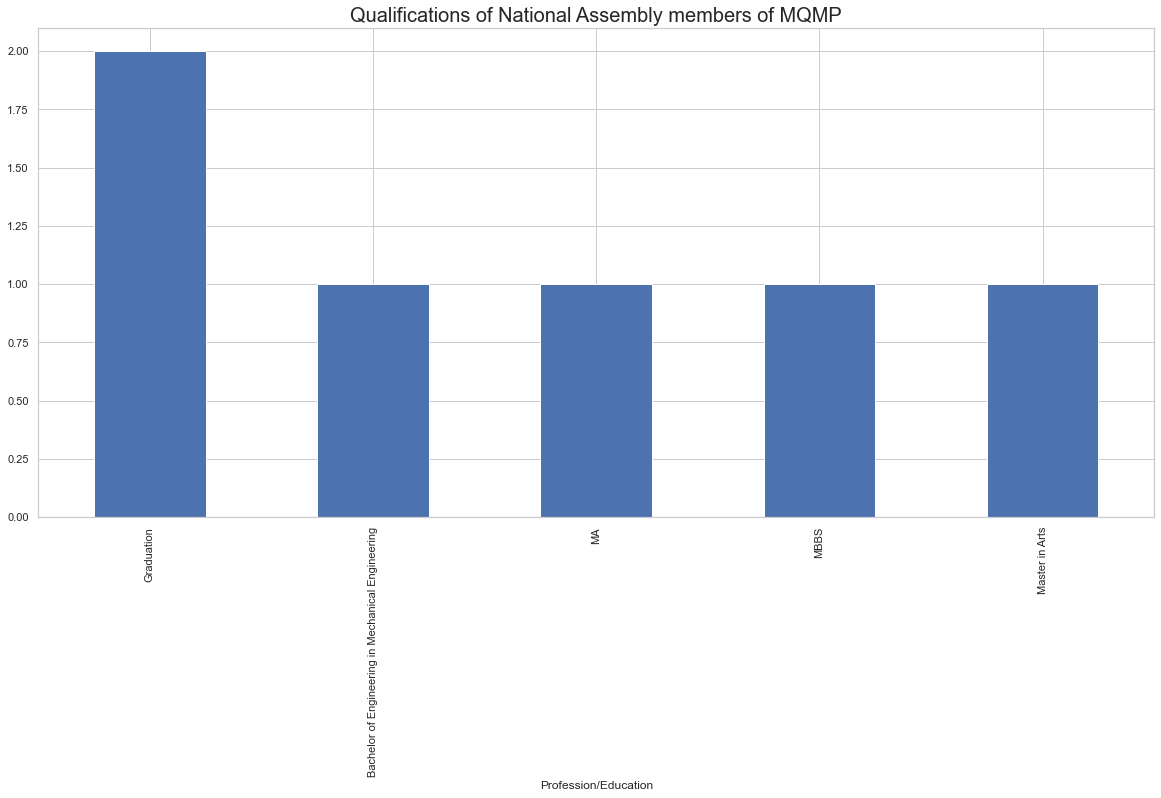

In [15]:
plt.figure(figsize=(20, 9))
df.groupby('Party')['Profession/Education'].value_counts().loc['MQMP'].plot(kind = 'bar')
plt.title('Qualifications of National Assembly members of MQMP', size = 20)
plt.show()